# Testing modular approach and master script for step integration

The idea is to integrate all my analysis in a single script.
The idea is to be tidy and consistent, andp rovide a sequential set of steps that would make anyone underastand what I did and how I reach my conclusiopns.
Eventually, this script could be uploaded in something like a git repository.

In [1]:
import US25UW990JEPL_02 as JEPL
import copy
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
t=1

In [2]:
init = JEPL.Initializer(data_path='/blue/mateescu/agustinchasco/Projects/reprojersey/data',
                        code_path='/blue/mateescu/agustinchasco/Projects/reprojersey/core',
                        testing=t)

init.Directories()
init.GetFormatMap()

Initialization: 

Code ipykernel_launcher.py starts. 
Codes executed when testing is 1. 
Running program in /blue/mateescu/agustinchasco/Projects/reprojersey/core. 
Reading data in /blue/mateescu/agustinchasco/Projects/reprojersey/data. 
Saving data in /blue/mateescu/agustinchasco/Projects/reprojersey/data. 
Time profiling starts. Program executed on 04-10-2025 at 01:18 PM EST.

Path `/blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test` already exists. 

Path `/blue/mateescu/agustinchasco/Projects/reprojersey/data/view` already exists. 

Loading map ipykernel_launcher_test_f4map.json in pathf4_map_path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test/ipykernel_launcher_test_f4map.json 
 

Loading map ipykernel_launcher_test_f5map.json in pathf5_map_path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/ipykernel_launcher/test/ipykernel_launcher_test_f5map.json 
 

Creation of master map ipykernel_launcher_test_fmap.jso

In [3]:
print(f'JEPL020101 activated when testing is {init.t}. \n')
fn = ['US25UW990JEPL.01_impl_010601pdfu.txt', 'US25UW990JEPL.01_test_010601pdfu.txt'][init.t]
fp = init.TargetPath(fn)

print(f'Loading file {fn} in path: \n {fp} \n \n')
dc = JEPL.DataContainer(init, pdfu = init.TXT_reader(target_path=fp))
dc.ShowDatasets()

JEPL020101 activated when testing is 1. 

Loading file US25UW990JEPL.01_test_010601pdfu.txt in path: 
 /blue/mateescu/agustinchasco/Projects/reprojersey/data/US25UW990JEPL.02/test/US25UW990JEPL.01_test_010601pdfu.txt 
 

init: <class 'US25UW990JEPL_02.Initializer'> (Not a DataFrame) 

pdfu: <class 'pandas.core.frame.DataFrame'> with shape (23353, 650) 



In [4]:
dc.SetKey(['pdfu'], [['f4X3', 'f4X4', 'f4X5', 'f4X35'], ['f5X3', 'f5X4', 'f5X5', 'f5X35']])

Setting key in merged dataset with 650 columns.


In [5]:
ks = dc.GetColKey(colnames=['Calving date (YYYYMMDD)', 'Lactation number for this record', 'Type of reproductive event', 'Date of reproductive event'])

In [6]:
# The way how the function was designed.., i need to spliut by dataframe... overcomplication
k4 = [k for k in ks if '4' == k[1]]
k5 = [k for k in ks if '5' == k[1]]

In [7]:
# overcomplication
dc.GetSubset(dataset_name='pdfu', 
             colf4=k4, 
             colf5=k5, 
             n=20000,
             lact='m', 
             seed=24, 
             save=False)

init: <class 'US25UW990JEPL_02.Initializer'> (Not a DataFrame) 

pdfu: <class 'pandas.core.frame.DataFrame'> with shape (23353, 651) 

sdf: <class 'pandas.core.frame.DataFrame'> with shape (20040, 44) 



# I need to extract time of labeled subsequent reproductive events.

In [9]:
dc.sdf.head()

,Key,f4X35,f4X43,f5X35,f5X37,f5X38,f5X52,f5X53,f5X67,f5X68,...,f5X262,f5X263,f5X277,f5X278,f5X292,f5X293,f5X307,f5X308,f5X322,f5X323
0,JE 20120216,20120216,01,20120216,A,20120421,P,20120703,,,...,,,,,,,,,,
1,JE 20161013,20161013,02,20161013,G,20161210,O,20170403,G,20170426,...,,,,,,,,,,
2,JE 20210726,20210726,03,20210726,A,20211021,P,20211119,,,...,,,,,,,,,,
3,JE84000006726960620160505,20160505,01,20160505,H,20160705,G,20160716,G,20160810,...,,,,,,,,,,
4,JE84000006754087220151208,20151208,02,20151208,A,20160208,P,20160311,,,...,,,,,,,,,,


# Update:
I want to see the interval calving first reproductive event. This is labeled as voluntary waiting period.

In [8]:
df = dc.sdf # simplify 
df.head()

,Key,f4X35,f4X43,f5X35,f5X37,f5X38,f5X52,f5X53,f5X67,f5X68,...,f5X262,f5X263,f5X277,f5X278,f5X292,f5X293,f5X307,f5X308,f5X322,f5X323
0,JE 20120216,20120216,01,20120216,A,20120421,P,20120703,,,...,,,,,,,,,,
1,JE 20161013,20161013,02,20161013,G,20161210,O,20170403,G,20170426,...,,,,,,,,,,
2,JE 20210726,20210726,03,20210726,A,20211021,P,20211119,,,...,,,,,,,,,,
3,JE84000006726960620160505,20160505,01,20160505,H,20160705,G,20160716,G,20160810,...,,,,,,,,,,
4,JE84000006754087220151208,20151208,02,20151208,A,20160208,P,20160311,,,...,,,,,,,,,,


In [11]:
df.shape

(20044, 44)

# Interval Pregnancy Calcing
- Get proportion of nulliparous and multiparous.
- Get proportion of ID-Lact ending reproductive sequence with P
- Get proportion of animals with 1 or more lactations.
- Among animals with multiple lactations, get difference between subsequent recorded lactations. Plot barplot. We should expect all 1.
- Among animals having two sequential lactations with diff 1, get interval between date last reproductive event and subsequent calving date. We should expect 9*30 

- Latter I will correct the staff related to shared columns. They must have consistent information.
- Another potential issue.., is that key is the concatenation of raw information. Errors in YYYYDDMM may lead to differnt keys.

In [9]:
c = []
for row in df.itertuples():
    if row.f4X35 == 'n'*8 and row.f5X35 == 'n'*8:
        print('error in condition 1')
        assert False
    elif row.f4X35 == 'n'*8 and row.f5X35.isdigit() and len(row.f5X35) == 8:
        c.append(row.f5X35)
    elif row.f4X35 == 'n'*8 and row.f5X35 == ' '*8:
        c.append(row.f5X35)
    elif row.f4X35.isdigit() and len(row.f4X35) == 8 and row.f5X35 == 'n'*8:
        c.append(row.f4X35)
    elif row.f4X35.isdigit() and len(row.f4X35) == 8 and row.f5X35.isdigit() and len(row.f5X35) == 8:
        c.append(row.f4X35)
    elif row.f4X35.isdigit() and len(row.f4X35) == 8 and row.f5X35 == ' '*8:
        print('error in condition 6')
        assert False
    elif row.f4X35 == ' '*8 and row.f5X35 == 'n'*8:
        c.append(row.f4X35)
    elif row.f4X35 == ' '*8 and row.f5X35.isdigit() and len(row.f5X35) == 8:
        print('error in condition 8')
        assert False
    elif row.f4X35 == ' '*8 and row.f5X35 == ' '*8:
        c.append(row.f4X35)
    else:
        print('Something unexpected is happening.')
        assert False

df['f4X35'] = c

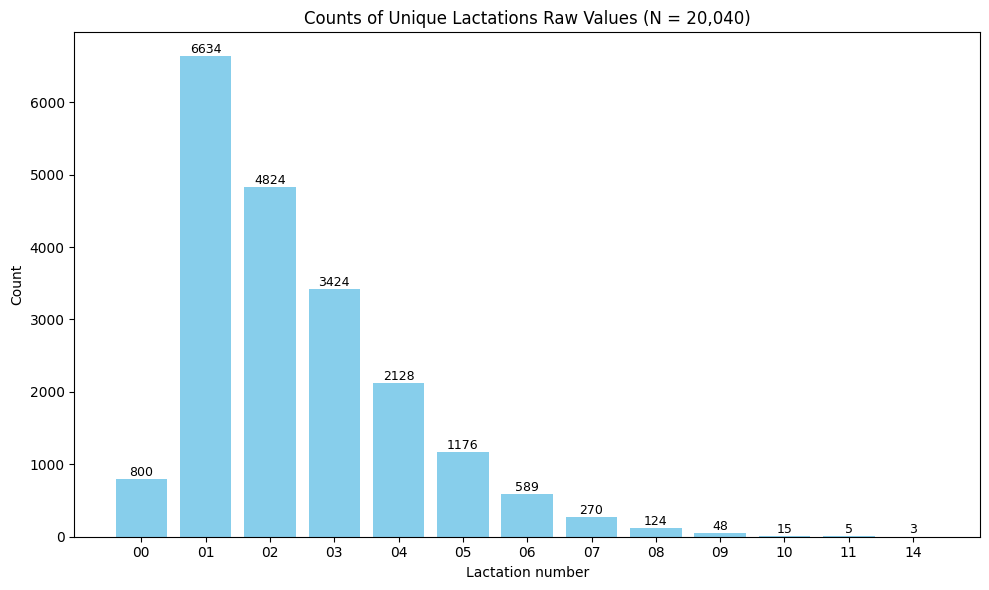

In [10]:
import matplotlib.pyplot as plt

# Get value counts
vc = df['f4X43'].value_counts()
vc = vc.sort_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(vc.index.astype(str), vc.values, color='skyblue')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

# Customize plot
plt.title(f'Counts of Unique Lactations Raw Values (N = {sum(vc):,})')
plt.xlabel('Lactation number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
print(f"Proportion of nulliparous over total: {100*sum(df['f4X43'] == '00')/df.shape[0]:.2} %")

Proportion of nulliparous over total: 4.0 %


# Number and proportion of Keys with reproductive event data.

In [12]:
print(sum(df['f5X37'] != 'n'))
print(sum(df['f5X37'] == 'n'))
print(100*sum(df['f5X37'] != 'n')/df.shape[0])
print(100*sum(df['f5X37'] == 'n')/df.shape[0])

16156
3884
80.6187624750499
19.381237524950098


# Among animals with reproductive data:
Show number of ID-Lactation which reproductive sequence ends in pregnancy success.

In [13]:
sk5 = [k5[i] for i in range(len(k5)) if i % 2 == 1]

In [14]:
cc = df[sk5].map(str.rstrip).agg(''.join, axis=1)
lc = cc.apply(lambda x: x[-1] if x else '')

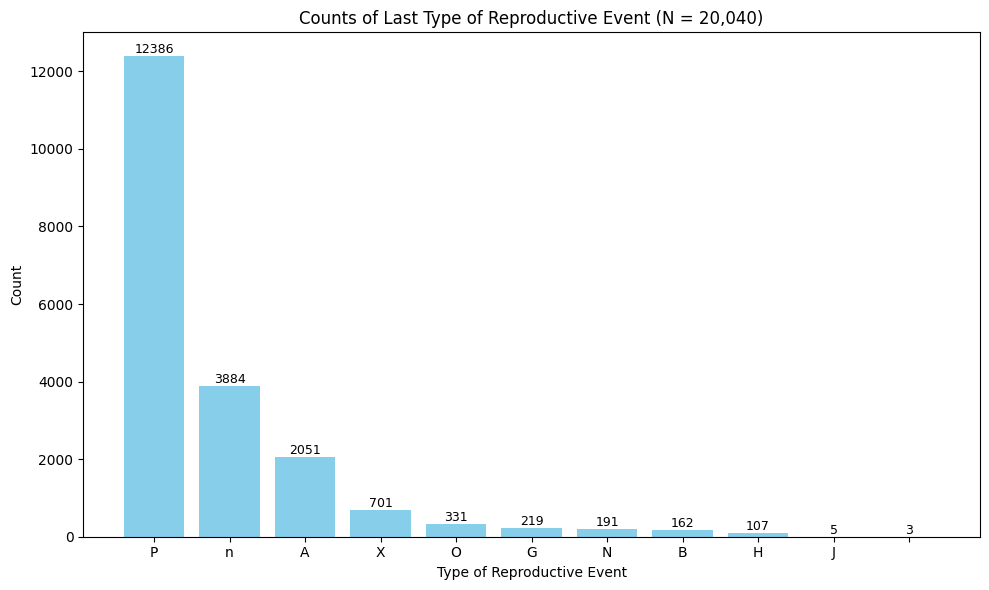

In [15]:
import pandas as pd
v_df = pd.DataFrame(lc, columns=['Last Type of Reproductive Event'])

vc = v_df['Last Type of Reproductive Event'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(vc.index.astype(str), vc.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.title(f'Counts of Last Type of Reproductive Event (N = {sum(vc):,})')
plt.xlabel('Type of Reproductive Event')
plt.ylabel('Count'),
plt.tight_layout()
plt.show()

In [21]:
print(f"Percentage of ID-LACT's ending reproductive events with recorded P: {100*int(vc['P'])/df.shape[0]:.2f} %")

Percentage of ID-LACT's ending reproductive events with recorded P: 61.89 %


# Proportion of animals with one or more lactations.

In [16]:
# assume key is perfect. I know I need to do corrections here. But carry on.
d = {}
for row in df.itertuples():
    if row.Key[:-8] not in d.keys():
        d[row.Key[:-8]] = 1
    else:
        d[row.Key[:-8]] += 1

        
c1 = 0
c2 = 0
for k in d:
    if d[k] == 1:
        c1 += 1
    else:
        c2 += 1

print(f'number of unique IDs = {c1:,}')
print(f'Number of unique IDs with multiple lactations = {c2:,}')
print(f'Number of unique IDs with a unique recorded lactation = {c1-c2:,}')
print(f'% of unique IDs with multiples lactations = {100*c2/(c1+c2):.2f}')
print(f'% of unique IDs single lactation = {100*c1/(c1+c2):.2f}')

number of unique IDs = 19,705
Number of unique IDs with multiple lactations = 166
Number of unique IDs with a unique recorded lactation = 19,539
% of unique IDs with multiples lactations = 0.84
% of unique IDs single lactation = 99.16


# Target animals with multiple lactations.
Get difference between subsequent lactation. I should expect 1.

In [17]:
v = []
n = df.shape[0]
i=0
while i + 1 < n:
    ki = df.at[i, 'Key']
    kf = df.at[i+1, 'Key']
    if ki[:-8] == kf[:-8]:
        li = df.at[i, 'f4X43']
        lf = df.at[i+1, 'f4X43']
        if li.isdigit() and lf.isdigit():
            v.append(int(lf) - int(li))
        i += 1
        continue
    else:
        i += 1
        continue

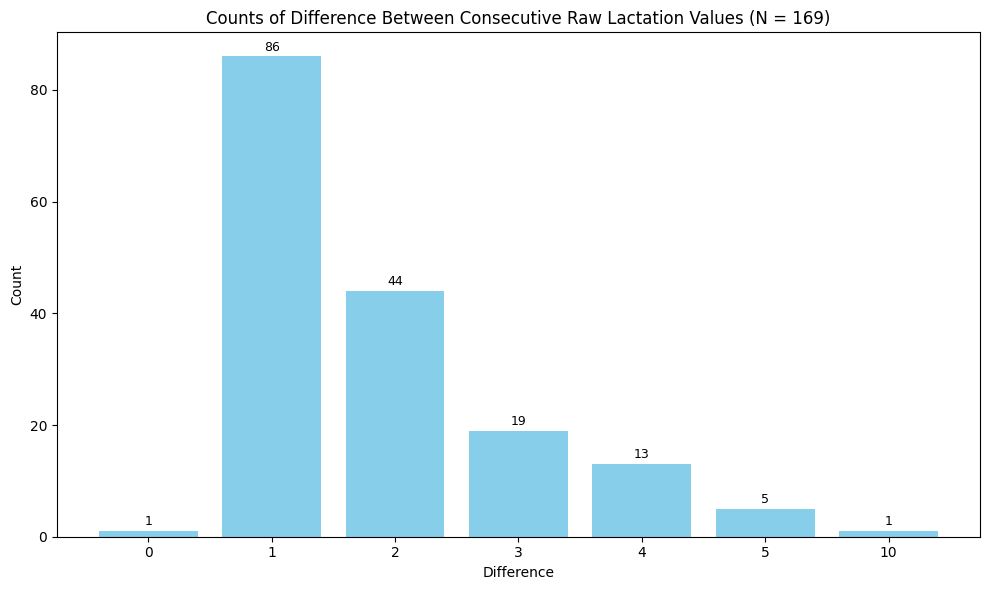

In [18]:
import pandas as pd
v_df = pd.DataFrame(v, columns=['Difference'])

vc = v_df['Difference'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(vc.index.astype(str), vc.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.title(f'Counts of Difference Between Consecutive Raw Lactation Values (N = {sum(vc):,})')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Among events with consecutive lactations:
- Proportion of previous events ending with P
- Interval P next calving.


In [19]:
cp = 0
ca = 0
i = 0
n = df.shape[0]
while i + 1 < n:
    ki = df.at[i, 'Key']
    kf = df.at[i+1, 'Key']
    if ki[:-8] == kf[:-8]:
        li = df.at[i, 'f4X43']
        lf = df.at[i+1, 'f4X43']
        if li.isdigit() and lf.isdigit() and int(lf) - int(li) == 1:
            ca += 1
            rr = df[sk5].iloc[i]
            rc = ''.join(rr.str.rstrip())
            rf = rc[-1] if rc else ''
            if 'P' == rf:
                cp += 1
                i += 1
            else:
                i += 1
        else:
            i += 1
    else:
        i += 1
print(f'Total number of consecutive lactation pairs: {ca:,}')
print(f'Total number of consecutive lactation pairs with a confirmed pregnancy check: {cp:,}')
print(f'Percentage of consecutive lactation pairs with a confirmed pregnancy check: {100*cp/ca:.2f}')

Total number of consecutive lactation pairs: 86
Total number of consecutive lactation pairs with a confirmed pregnancy check: 72
Percentage of consecutive lactation pairs with a confirmed pregnancy check: 83.72


# Among events with consecutive lactations:
Target last recorded reproductive event that is not P and show frequency distribution of such event.

In [20]:
v = []
i = 0
n = df.shape[0]
while i + 1 < n:
    ki = df.at[i, 'Key']
    kf = df.at[i+1, 'Key']
    if ki[:-8] == kf[:-8]:
        li = df.at[i, 'f4X43']
        lf = df.at[i+1, 'f4X43']
        if li.isdigit() and lf.isdigit() and int(lf) - int(li) == 1:
            rr = df[sk5].iloc[i]
            rc = ''.join(rr.str.rstrip())
            rf = rc[-1] if rc else ''
            if 'P' != rf:
                v.append(rf)
                i += 1
            else:
                i += 1
        else:
            i += 1
    else:
        i += 1

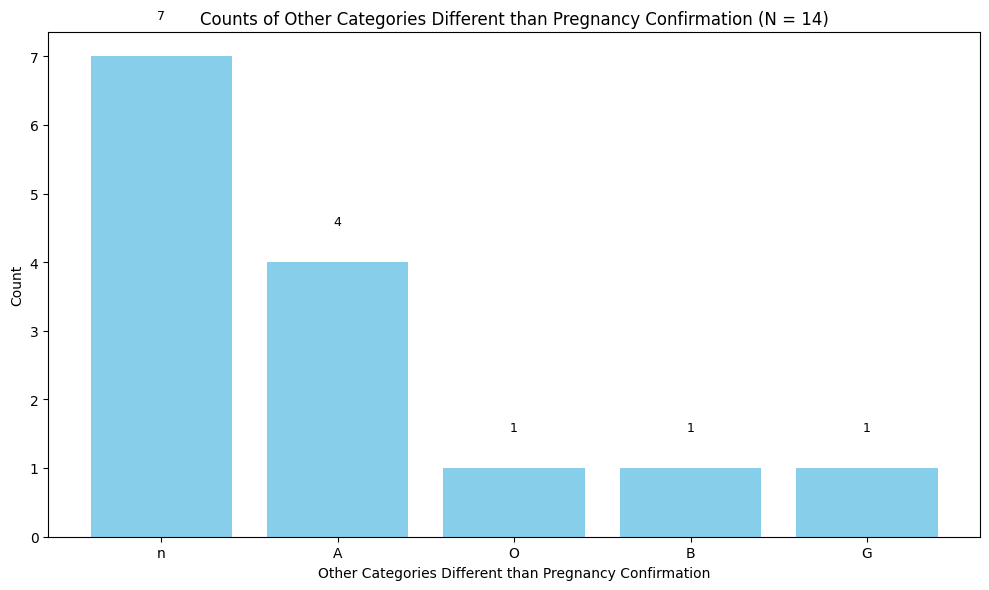

In [21]:
v_df = pd.DataFrame(v, columns=['Other Categories Different than Pregnancy Confirmation'])

vc = v_df['Other Categories Different than Pregnancy Confirmation'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(vc.index.astype(str), vc.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.title(f'Counts of Other Categories Different than Pregnancy Confirmation (N = {sum(vc):,})')
plt.xlabel('Other Categories Different than Pregnancy Confirmation')
plt.ylabel('Count'),
plt.tight_layout()
plt.show()

# Among consecutive lactations:
- Interval Pregnancy check and calving
Split histogram in 2:

1- Show differences for these animals with recorded P - Calving.

2- Show differences for these anumals with recorded notP - Calving.

In [22]:
kt = dc.GetColKey(colnames=['Type of reproductive event'])
kd = dc.GetColKey(colnames=['Date of reproductive event'])
vp = []
vo = []
i = 0
n = df.shape[0]
while i + 1 < n:
    ki = df.at[i, 'Key']
    kf = df.at[i+1, 'Key']
    cd = df.at[i+1, 'f4X35']
    if ki[:-8] == kf[:-8] and cd.isdigit():
        li = df.at[i, 'f4X43']
        lf = df.at[i+1, 'f4X43']
        if li.isdigit() and lf.isdigit() and int(lf) - int(li) == 1:
            z = 0
            v = -1
            while z + 1 <= len(kd):
                rd = df.at[i, kd[z]]
                if rd.isdigit():
                    v = z
                    z += 1
                else:
                    z += 1
            if v != -1:
                rt = df.at[i, kt[v]]
                rd = df.at[i, kd[v]]
                ld = datetime.strptime(rd, "%Y%m%d")
                ud = datetime.strptime(cd, "%Y%m%d")
                diff = (ud-ld).days
                if 'P' == rt:
                    vp.append(diff)
                    i += 1
                else:
                    vo.append(diff)
                    i += 1
            else:
                i += 1
        else:
            i += 1
    else:
        i += 1            

# Plot result.

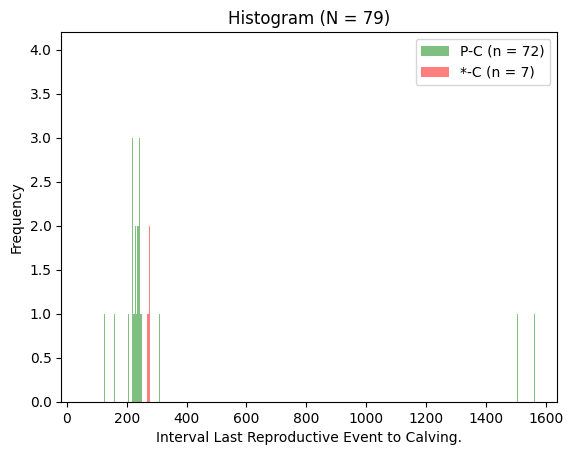

In [23]:
import numpy as np
be = np.arange(min(vp)-1, max(vp)+1)
plt.hist(vp, bins=be, alpha=0.5, label=f'P-C (n = {len(vp)})', color='green')
plt.hist(vo, bins=be, alpha=0.5, label=f'*-C (n = {len(vo)})', color='red')
plt.legend()
plt.title(f"Histogram (N = {len(vp) + len(vo)})")
plt.xlabel("Interval Last Reproductive Event to Calving.")
plt.ylabel("Frequency")
plt.show()
plt.close()